We first load few library including the machine learning library Tensorflow.

In [2]:
import numpy as np
import tensorflow.keras as tk
from tensorflow.keras import layers
import matplotlib.pylab as plt

We are loading a famous dataset in Machine Learning called **MNIST** 

MNIST are images of handwritten digits (from 0 to 9)

Information about MNIST: https://en.wikipedia.org/wiki/MNIST_database


In [3]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

The size of `x_train` gives the number of instances in the dataset and the size of each instance.

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

We pick up an arbitrary instance from the dataset to look at it:

In [6]:
img = 22876

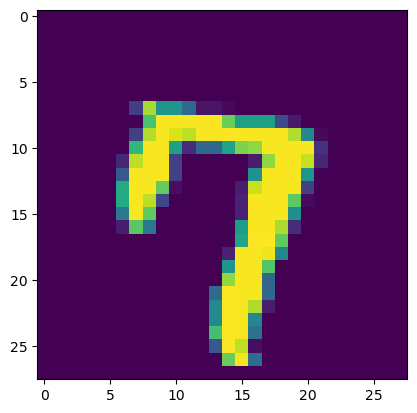

In [7]:
plt.imshow(x_train[img])

Both arrays of data `x_train` and `y_train` have the same size: each **instance** (an image of a handwritten digit) has an associated **label**.

For instance, for the arbitrary instance previously visualised:

In [8]:
y_train[img]

7

Finally, `x_test` is comprised of examples that are not included in `x_train`, and `y_test` are the labels associated to them.

# Supervised Machine Learning

## Concepts

Let suppose that we have `x_train` comprised of datapoints e.g. images, and `y_train` in which each entry is associated with each entry of `x_train`, e.g. labels. We say that `x_train` are ìnputs and `y_train` are `outputs` of the problem we want to model.

### Definition

In supervissed ML, the goal is to find the mapping between *inputs* (data points) and their corresponding *outputs*. 

Taking the exemple of MNIST, a supervised ML algorithm applied to this dataset has to find a mapping between each image (`28 x 28` numbers) and its correponding label. Say differently, the algorithm has to find in the image what makes it belong to the class `0`, or `3` or `6` etc. 

In [9]:
idx = np.where(y_train == 6)[0][:3]

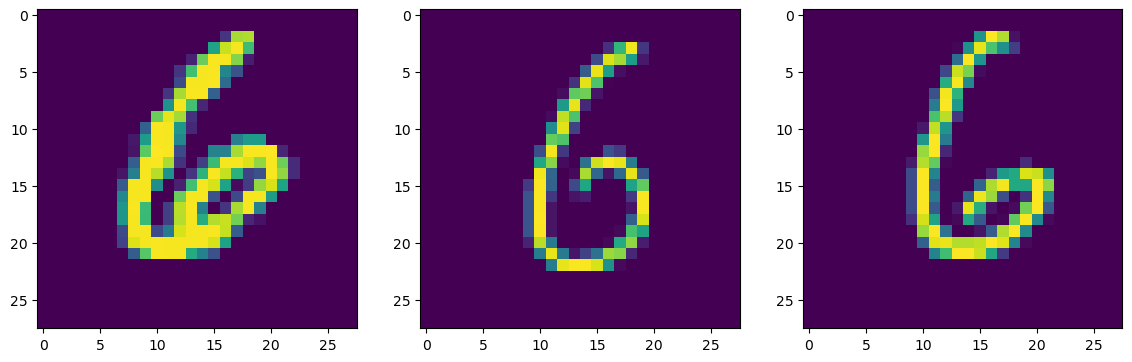

In [10]:
plt.figure(figsize=(14,8))
plt.subplot(1,3,1)
plt.imshow(x_train[idx[0]])
plt.subplot(1,3,2)
plt.imshow(x_train[idx[1]])
plt.subplot(1,3,3)
plt.imshow(x_train[idx[2]])

### What for?

Once an aglorithm trained to understand the link between inputs and outputs, the same algorithm can then predict on an unseen datapoint (for instance an image) its likeliest output. 

If the outputs are labels (such as in MNIST), this task is called **classification**. 

![](https://user-images.githubusercontent.com/29728855/58266484-5cb2bb00-7d9f-11e9-864b-4574ab70ae4c.png)

if the outputs are real numbers, this task is called **regression**. As an exemple of a regression task, consider that inputs are images of houses and outputs are prices. An algorithm trained on such dataset will build a mapping between the content of the image (size of the house, colours, etc..) and a price. If we give as input an unseen photo of a house, such algorithm should be able to predict its price. 

![](https://pyimagesearch.com/wp-content/uploads/2019/01/keras_regression_css_header.png)

### Assess performance

To assess a ML algorithm, we test its capacity to generalise to unseen data. Typically, we train a model with a `training` dataset (in case of MNIST, it is called `(x_train, y_train)`) and evaluate its performance on a `testing` dataset  (in case of MNIST, it is called `(x_test, y_test)`). Obviously, there are **no** common instance between a training and a testing dataset. 

To evaluate the performance, we use some metrics:
* **Accuracy** is the fact to count the number of correct predictions divided by the total number of predictions made. Since we have the expected outputs `y_test` for the testing inputs `x_test`, it's easy to count the number of correct predictions

$$
\frac{correct \ predictions \ on \ x\_test}{total \ predictions}
$$

* **Confusion matrix**: rows are the ground truth categories, columns are the predicted ones. A cell at (i,j) is the number of instances from class i that have been predicted as belonging to class j

![](https://qph.fs.quoracdn.net/main-qimg-7c4efb27dd2bd6d0c281d294b824ff4c)

* **TP, FP, FN, TN**: True positives, False positives, False negatives, True negatives

<div style="width:600px; text-align:center;">
<img src="https://www.researchgate.net/profile/D_Soeffker/publication/328860691/figure/fig2/AS:691499431907328@1541877720208/Confusion-matrix-and-related-performance-measures.png">
</div>

## Exploring classification on MNIST using k-Neighrest Neighbour algorithm

Training a classifier on MNIST

In [11]:
import random
idx = np.arange(60000)
random.shuffle(idx)

In [12]:
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

In [13]:
X_train.shape

(60000, 784)

We will train a k-nearest neighbour algorithm. 

<div style="width:400px;"><img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/03/knn3.png"></div>

In a k-nearest neighbour algorithm (KNN), an input is classified regarding the proximity of its neighbors. The input will be predicted as belonging to the class C if the majority of the k-nearest neighbour belongs to class C.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
clf = KNeighborsClassifier(n_neighbors=3)

In [20]:
idxtra = idx[:20000] # take only 20000 examples to reduce computation time

In [21]:
clf.fit(X_train[idxtra], y_train[idxtra])

KNeighborsClassifier(n_neighbors=3)

### Performance evaluation

Let's evaluate the performance of the trained algorithm by computing first its accuracy on the testing dataset given by `(x_test, y_test)`: 

In [22]:
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
y_test = y_test

In [23]:
X_test.shape

(10000, 784)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
n_correct = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        n_correct = n_correct + 1

In [26]:
accuracy = n_correct / len(y_pred)

In [27]:
accuracy * 100.0

96.09

Note that there is a function to compute accuracy in sklearn: `score`

In [28]:
score = clf.score(X_test, y_test)
print(score)

0.9609


We can also inspect the confusions between classes:

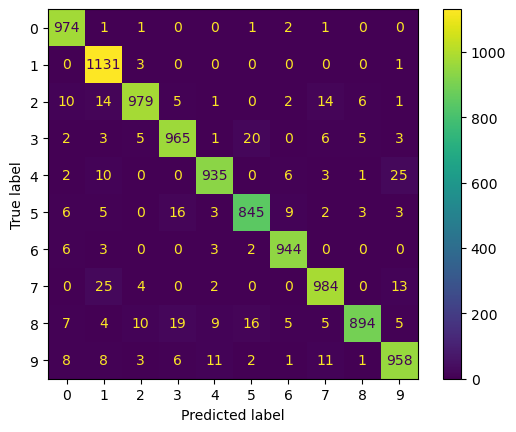

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

And the F-Score

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="macro")

0.9607060733938754

### Inspect mis-classifications

When assessing classification performance, we are not only interested in inspecting the number of good predictions. It is also insightful to inspect the examples that have been incorrectly classified. 

Let's get the indexes of the misclassified examples:

In [31]:
misclassified = [k for k in range(len(y_pred)) if y_pred[k] != y_test[k]]

We plot the first five:

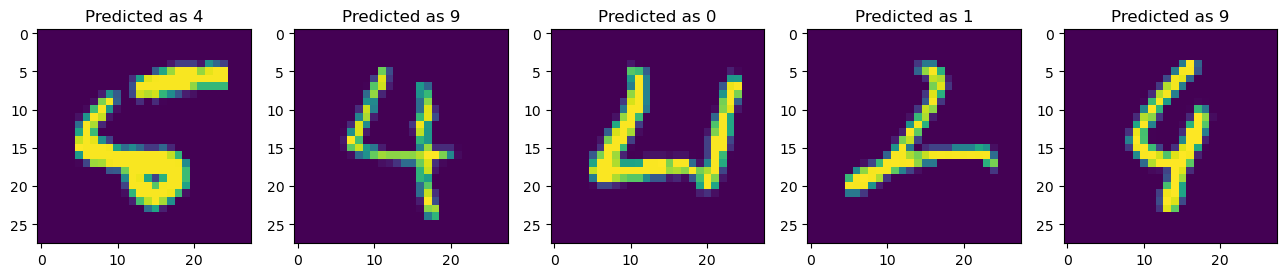

In [32]:
plt.figure(figsize=(16,6))
for k in range(5):
    plt.subplot(1, 5, k+1)
    plt.imshow(x_test[misclassified[k]])
    plt.title('Predicted as {}'.format(y_pred[misclassified[k]]))

### Finding the best model parameters

To find the best model, a common way in machine learning is to perform a *grid search* which means to train the model with various set of parameters and take the set of parameters that returns the best accuracy (or fscore). 

Such process is very time and ressource consuming! 

In [33]:
accuracies = []
for k in range(1, 8):
    print('test {}'.format(k))
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train[idxtra], y_train[idxtra])
    score = clf.score(X_test, y_test)
    accuracies.append(score)

test 1
test 2
test 3
test 4
test 5
test 6
test 7


We then plot the accuracies along the values of parameter *k*

Text(0.5, 0, 'k')

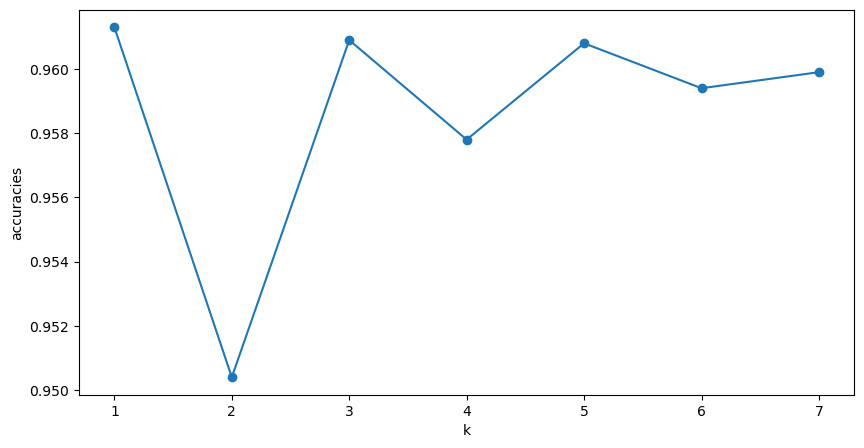

In [34]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(accuracies)+1), accuracies, '-o')
plt.ylabel('accuracies')
plt.xlabel('k') 

Conclusion: best model is for `k=?`

## Exploring Deep Learning based classification on MNIST

State of the art algorithms are all based on Deep Neural Networks (DNNs). 

DNNs for classification looks like this:
<div style="width:700px"><img src="https://miro.medium.com/max/6694/1*Enbag4OPicgOFGP6m281lQ.jpeg"></div>

There are many different architectures of DNNs. The most famous one applied to image inputs are Convolutional Neural Networks (CNNs). That's the one will test on MNIST.

The exemple shown comes from the keras tutorial that can be found here: https://keras.io/examples/vision/mnist_convnet/

Before starting we have to prepare the data:

In [35]:
# Scale images to the [0, 1] range
x_train_dl = x_train[idxtra].astype("float32") / 255
x_test_dl = x_test.astype("float32") / 255

In [36]:
# Make sure images have shape (28, 28, 1)
x_train_dl = np.expand_dims(x_train_dl, -1)
x_test_dl = np.expand_dims(x_test_dl, -1)

In [37]:
x_train_dl.shape

(20000, 28, 28, 1)

In [38]:
# convert class vectors to binary class matrices
y_train_dl = keras.utils.to_categorical(y_train[idxtra], 10)
y_test_dl = keras.utils.to_categorical(y_test, 10)

In [39]:
y_train_dl.shape

(20000, 10)

We use Keras, an interface for Tensorflow to easily create a Neural Network. Keras acts as an interface for Tensorflow, and allows to rapidly setup the architecture of a Neural Network by stacking layers of Neurons or activation functions.

In [40]:
model = tk.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

The neural network is comprised of trainable weights that must be optimized to learn the mapping between the inputs and the outputs. We provide training data in batches (groups) to the model and at each epoch (i.e. optimization step), the trainable weights of the network are updated according to the error made by the model. We call this process `gradient descent algorithm`.

In [41]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
logs = model.fit(x_train_dl, 
                 y_train_dl, 
                 batch_size=128, 
                 epochs=10, 
                 validation_split=0.1, 
                 verbose=1)

Epoch 1/10


2024-03-04 16:56:00.388907: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


141/141 [==============================] - 8s 53ms/step - loss: 0.7175 - accuracy: 0.7857 - val_loss: 0.1996 - val_accuracy: 0.9500
Epoch 2/10
141/141 [==============================] - 6s 41ms/step - loss: 0.1992 - accuracy: 0.9406 - val_loss: 0.1364 - val_accuracy: 0.9595
Epoch 3/10
141/141 [==============================] - 6s 41ms/step - loss: 0.1467 - accuracy: 0.9541 - val_loss: 0.1166 - val_accuracy: 0.9650
Epoch 4/10
141/141 [==============================] - 6s 39ms/step - loss: 0.1163 - accuracy: 0.9645 - val_loss: 0.0952 - val_accuracy: 0.9740
Epoch 5/10
141/141 [==============================] - 6s 44ms/step - loss: 0.1009 - accuracy: 0.9692 - val_loss: 0.0917 - val_accuracy: 0.9710
Epoch 6/10
141/141 [==============================] - 7s 49ms/step - loss: 0.0868 - accuracy: 0.9719 - val_loss: 0.0848 - val_accuracy: 0.9775
Epoch 7/10
141/141 [==============================] - 7s 49ms/step - loss: 0.0792 - accuracy: 0.9751 - val_loss: 0.0841 - val_accuracy: 0.9785
Epoch 8/10

Now the Neural Network is trained, let's predict labels on unseed images and compute the accuracy.

In [43]:
y_pred_dl = model.predict(x_test_dl)
n_correct = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        n_correct = n_correct + 1

313/313 [==============================] - 2s 5ms/step


In [44]:
print(n_correct/len(y_pred)*100.0)

96.09


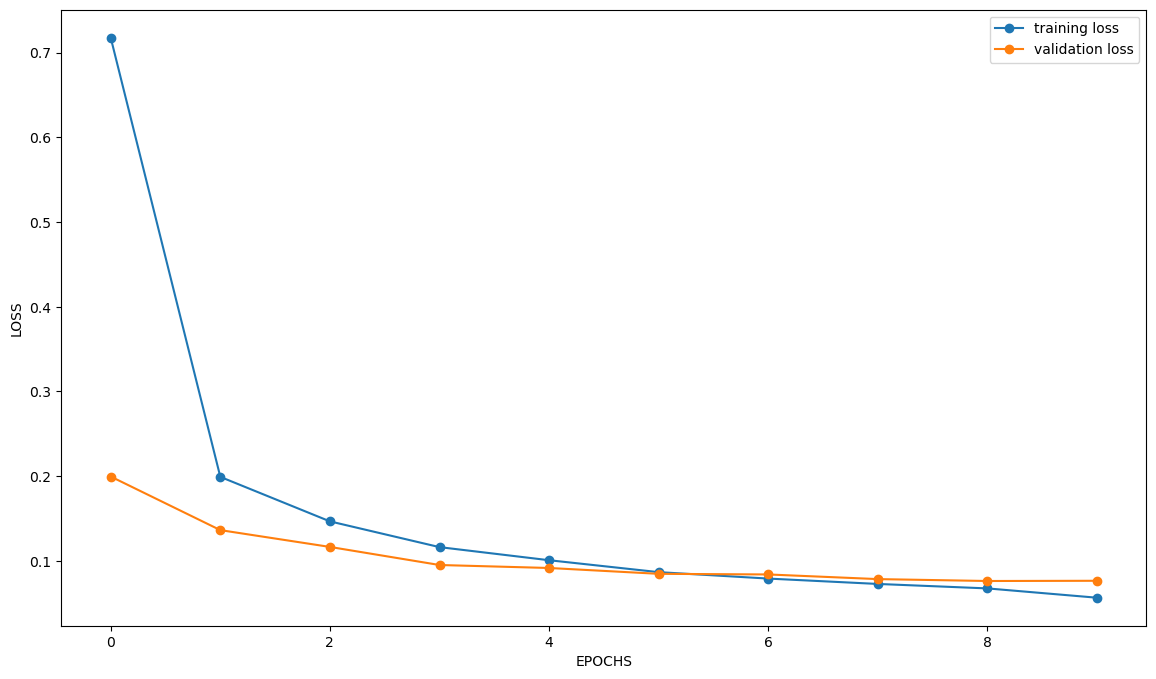

In [45]:
plt.figure(figsize=(14,8))
plt.plot(logs.history['loss'], '-o', label='training loss')
plt.plot(logs.history['val_loss'], '-o', label='validation loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCHS')
plt.legend()

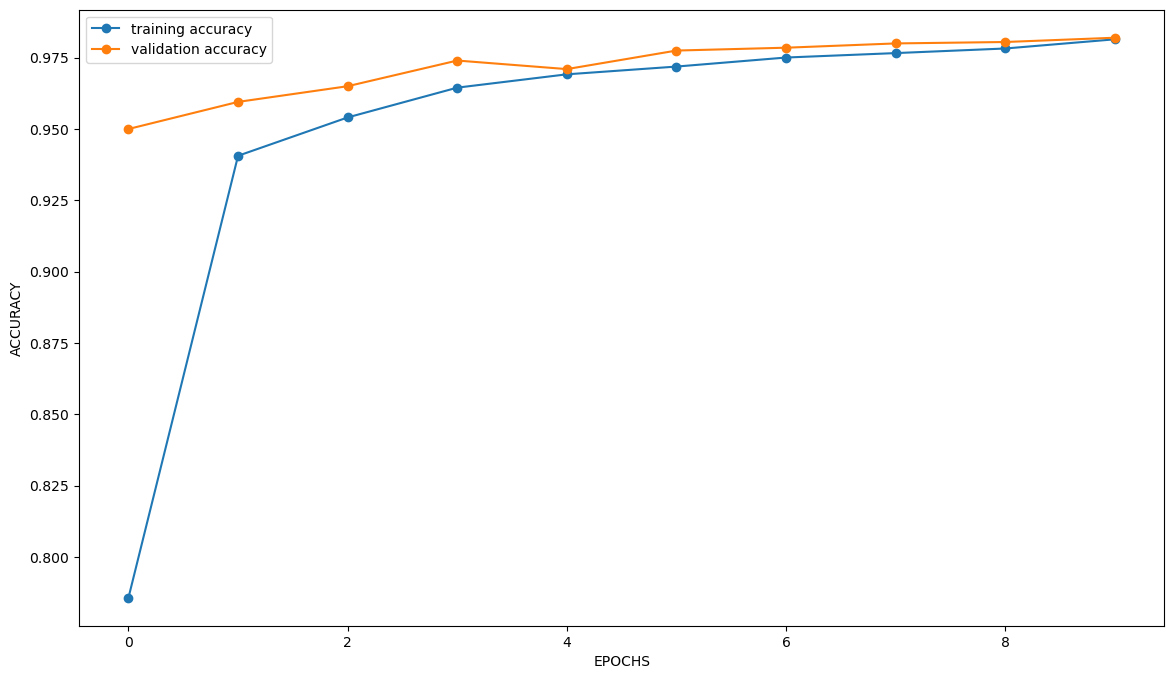

In [46]:
plt.figure(figsize=(14,8))
plt.plot(logs.history['accuracy'], '-o', label='training accuracy')
plt.plot(logs.history['val_accuracy'], '-o', label='validation accuracy')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCHS')
plt.legend()

# Unsupervised Machine Learning

## Concepts

### Definition

In unsupervised machine learning, the goal is find structures in `x_train` without having access to `y_train`. 

### Tasks

Typical task in unsupervised machine learning is clustering, which is the task of grouping data in clusters of instances which are the closest (according to some metrics). However we do not have labels for this clusters. Typically, we arbitrarily give them an integer. 

Another typical task in unsupervised machine learning is *generation* where we provide examples that the algorithm tries to generate the best possible. 

## Clustering on MNIST

We will illustrate clustering through the k-means algorithm

<div style="width:700px"><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1200%2F1*rw8IUza1dbffBhiA4i0GNQ.png&f=1&nofb=1"></div>

In [47]:
from sklearn.cluster import KMeans

Declare and fit kmeans

In [48]:
clust = KMeans(n_clusters=10, random_state=0, n_init=10)
clust.fit(X_train[idxtra])

KMeans(n_clusters=10, n_init=10, random_state=0)

We can then predict the cluster id for each example in the test set, the same way we did in classification when predicting the label associated to an example:

In [49]:
y_pred_clust = clust.predict(X_test)

In [50]:
y_pred_clust

array([6, 4, 0, ..., 6, 9, 2], dtype=int32)

Quick and dirty test of the overlap between **classes** and **clusters**

In [51]:
n_overlaps = 0
for k in range(10):
    idx = np.where(y_test == k)[0]
    h = np.max([list(y_pred_clust[idx]).count(l) for l in range(10)])
    n_overlaps += h
print('Consistency: {:.2f}%'.format(n_overlaps/len(y_test)*100.0))

Consistency: 61.08%


### How to visualise the results?

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_test)

PCA(n_components=2)

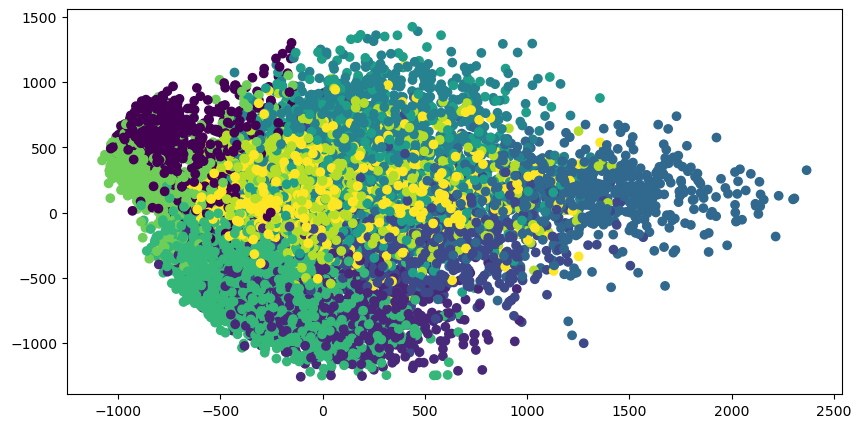

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(pca.transform(X_test)[:, 0], pca.transform(X_test)[:, 1], c=y_pred_clust)

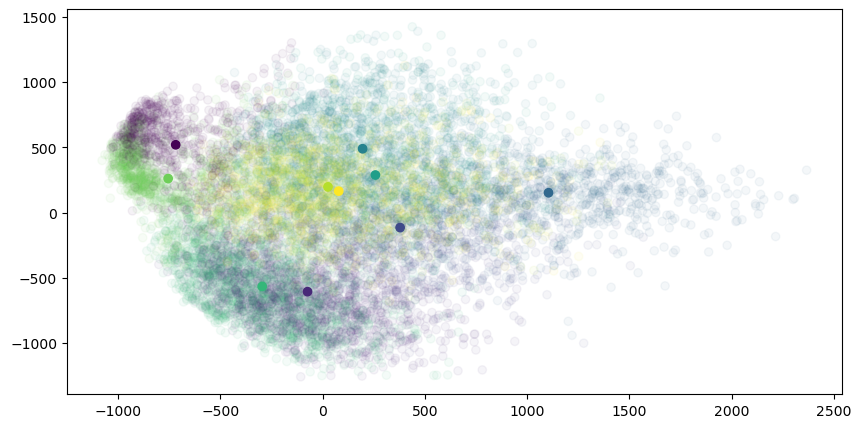

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(pca.transform(X_test)[:, 0], pca.transform(X_test)[:, 1], c=y_pred_clust, alpha=0.05)
plt.scatter(pca.transform(clust.cluster_centers_)[:, 0], pca.transform(clust.cluster_centers_)[:, 1], c=np.arange(10))

### How good is the fit?

There is no clear metrics to compute the goodness of fit because we don't have ground truth about the cluster in which belongs each example. 

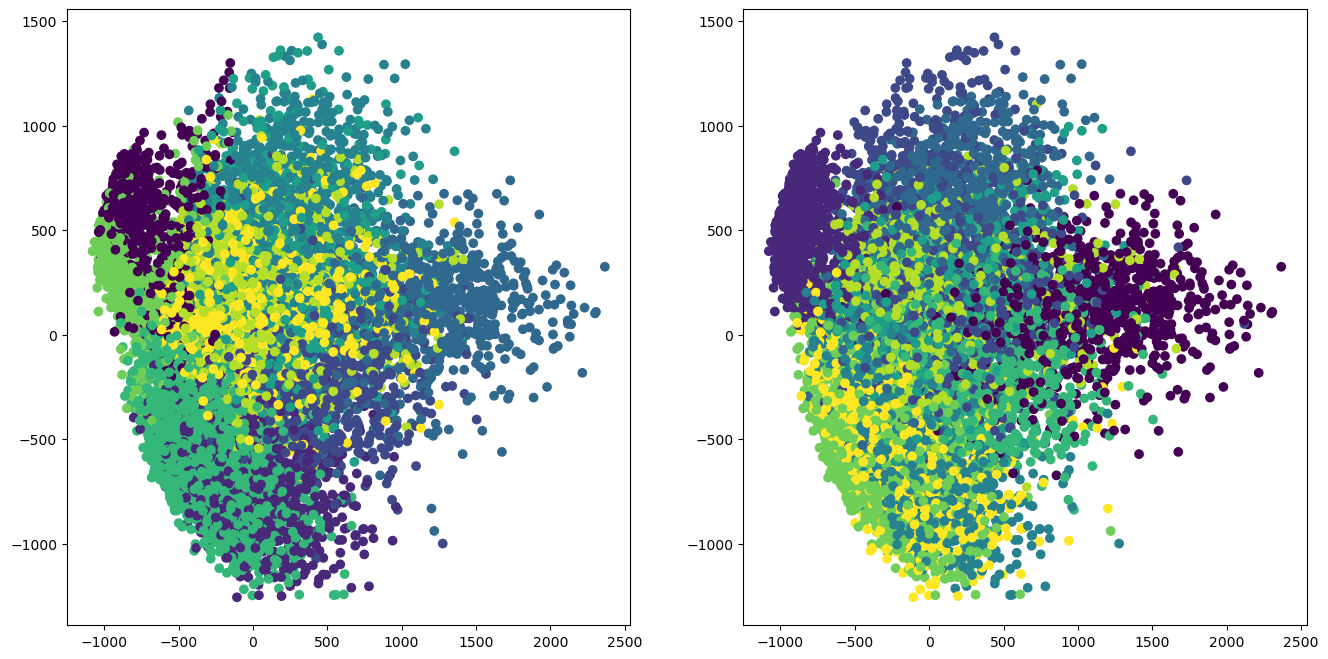

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(pca.transform(X_test)[:, 0], pca.transform(X_test)[:, 1], c=y_pred_clust)
plt.subplot(1,2,2)
plt.scatter(pca.transform(X_test)[:, 0], pca.transform(X_test)[:, 1], c=y_test)

# Generative models

In generative machine learning, the goal is be able to generate data that looks like what we have in `x_train` 

A very famous approach (now a bit outdated) is the Generative Adversarial Networks (proposed in 2014, with model improvements until ~2020)

<div style="width:700px"><img src="https://hyeongminlee.github.io/img/GAN_001/fig_1.png"></div>

Example of a GAN trained on MNIST (taken from https://keras.io/examples/generative/conditional_gan/)

In [57]:
import tensorflow as tf
import keras
from keras import layers
# from keras import ops
import imageio
from tensorflow_docs.vis import embed
import json

ModuleNotFoundError: No module named 'tensorflow_docs'

In [ ]:
batch_size = 64
num_channels = 1
num_classes = 10
image_size = 28
latent_dim = 128

In [ ]:
# Reload MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
all_labels = keras.utils.to_categorical(all_labels, 10)

In [ ]:
# Create tf.data.Dataset.
dataset = tf.data.Dataset.from_tensor_slices((all_digits, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print("Shape of training images:", all_digits.shape)
print("Shape of training labels", all_labels.shape)

In [ ]:
generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_channels + num_classes

In [ ]:
# Create the discriminator.
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer((28, 28, discriminator_in_channels)),
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="discriminator",
)

# Create the generator.
generator = keras.Sequential(
    [
        keras.layers.InputLayer((generator_in_channels,)),
        # We want to generate 128 + num_classes coefficients to reshape into a
        # 7x7x(128 + num_classes) map.
        layers.Dense(7 * 7 * generator_in_channels),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, generator_in_channels)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(),
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
    ],
    name="generator",
)

In [ ]:
class ConditionalGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        real_images, one_hot_labels = data

        # Add dummy dimensions to the labels so that they can be concatenated with
        # the images. This is for the discriminator.
        image_one_hot_labels = one_hot_labels[:, :, None, None]
        image_one_hot_labels = ops.repeat(
            image_one_hot_labels, repeats=[image_size * image_size]
        )
        image_one_hot_labels = ops.reshape(
            image_one_hot_labels, (-1, image_size, image_size, num_classes)
        )

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        random_vector_labels = ops.concatenate(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Decode the noise (guided by labels) to fake images.
        generated_images = self.generator(random_vector_labels)

        # Combine them with real images. Note that we are concatenating the labels
        # with these images here.
        fake_image_and_labels = ops.concatenate(
            [generated_images, image_one_hot_labels], -1
        )
        real_image_and_labels = ops.concatenate([real_images, image_one_hot_labels], -1)
        combined_images = ops.concatenate(
            [fake_image_and_labels, real_image_and_labels], axis=0
        )

        # Assemble labels discriminating real from fake images.
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )

        # Train the discriminator.
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        random_vector_labels = ops.concatenate(
            [random_latent_vectors, one_hot_labels], axis=1
        )

        # Assemble labels that say "all real images".
        misleading_labels = ops.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            fake_images = self.generator(random_vector_labels)
            fake_image_and_labels = ops.concatenate(
                [fake_images, image_one_hot_labels], -1
            )
            predictions = self.discriminator(fake_image_and_labels)
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss)
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

In [ ]:
cond_gan = ConditionalGAN(discriminator=discriminator, 
                          generator=generator, 
                          latent_dim=latent_dim)

cond_gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)

In [ ]:
# Train model 
n_epochs = 1
cond_gan.fit(dataset, epochs=n_epochs)

In [ ]:
# Saving model
json_config = cond_gan.generator.to_json()
with open('generator_ep={:d}.config.json'.format(n_epochs), 'w') as f:
    json.dump(json_config, f)
cond_gan.generator.save_weights('generator_ep={:d}.weights.h5'.format(n_epochs))

In [ ]:
# Loading weights
cond_gan.generator.load_weights('generator_ep=10.weights.h5')

### Generate an image

In [ ]:
input_noise = keras.random.normal(shape=(1, latent_dim))
input_label = tf.convert_to_tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])
noise_and_labels = ops.concatenate([input_noise, input_label], 1)
fake = trained_gen.predict(noise_and_labels)

In [ ]:
plt.imshow(fake[0])

In [ ]:
for k in range(6):
    input_noise = keras.random.normal(shape=(1, latent_dim))
    input_label = tf.convert_to_tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])
    noise_and_labels = ops.concatenate([input_noise, input_label], 1)
    fake = trained_gen.predict(noise_and_labels)
    plt.subplot(2, 3, int(k/3)*3+k%3+1)
    plt.imshow(fake[0])

### Interpolation between classes

In [ ]:
# We first extract the trained generator from our Conditional GAN.
trained_gen = cond_gan.generator

# Choose the number of intermediate images that would be generated in
# between the interpolation + 2 (start and last images).
num_interpolation = 9  # @param {type:"integer"}

# Sample noise for the interpolation.
interpolation_noise = keras.random.normal(shape=(1, latent_dim))
interpolation_noise = ops.repeat(interpolation_noise, repeats=num_interpolation)
interpolation_noise = ops.reshape(interpolation_noise, (num_interpolation, latent_dim))


def interpolate_class(first_number, second_number):
    # Convert the start and end labels to one-hot encoded vectors.
    first_label = keras.utils.to_categorical([first_number], num_classes)
    second_label = keras.utils.to_categorical([second_number], num_classes)
    first_label = ops.cast(first_label, "float32")
    second_label = ops.cast(second_label, "float32")
    print(first_label)
    print(second_label)

    # Calculate the interpolation vector between the two labels.
    percent_second_label = ops.linspace(0, 1, num_interpolation)[:, None]
    percent_second_label = ops.cast(percent_second_label, "float32")
    interpolation_labels = (first_label * (1 - percent_second_label) + second_label * percent_second_label)

    # Combine the noise and the labels and run inference with the generator.
    print(interpolation_noise.shape, interpolation_labels.shape)
    noise_and_labels = ops.concatenate([interpolation_noise, interpolation_labels], 1)
    fake = trained_gen.predict(noise_and_labels)
    return fake


start_class = 2  # @param {type:"slider", min:0, max:9, step:1}
end_class = 6  # @param {type:"slider", min:0, max:9, step:1}

fake_images = interpolate_class(start_class, end_class)


In [ ]:
fake_images *= 255.0
converted_images = fake_images.astype(np.uint8)
converted_images = ops.image.resize(converted_images, (96, 96)).numpy().astype(np.uint8)
imageio.mimsave("animation.gif", converted_images[:, :, :, 0], fps=1)
embed.embed_file("animation.gif")